In [1]:
import itertools
import networkx as nx

In [2]:
def margulis_gabber_galil_graph(n, create_using=None):
    G = nx.empty_graph(0, create_using, default=nx.MultiGraph)
    if G.is_directed() or not G.is_multigraph():
        msg = "`create_using` must be an undirected multigraph."
        raise nx.NetworkXError(msg)

    for x, y in itertools.product(range(n), repeat=2):
        for u, v in (
            ((x + 2 * y) % n, y),
            ((x + (2 * y + 1)) % n, y),
            (x, (y + 2 * x) % n),
            (x, (y + (2 * x + 1)) % n),
        ):
            G.add_edge((x, y), (u, v))
    G.graph["name"] = f"margulis_gabber_galil_graph({n})"
    return G

In [3]:
def chordal_cycle_graph(p, create_using=None):
    G = nx.empty_graph(0, create_using, default=nx.MultiGraph)
    if G.is_directed() or not G.is_multigraph():
        msg = "`create_using` must be an undirected multigraph."
        raise nx.NetworkXError(msg)

    for x in range(p):
        left = (x - 1) % p
        right = (x + 1) % p
        chord = pow(x, p - 2, p) if x > 0 else 0
        for y in (left, right, chord):
            G.add_edge(x, y)
    G.graph["name"] = f"chordal_cycle_graph({p})"
    return G

In [4]:
def paley_graph(p, create_using=None):
    G = nx.empty_graph(0, create_using, default=nx.DiGraph)
    if G.is_multigraph():
        msg = "`create_using` cannot be a multigraph."
        raise nx.NetworkXError(msg)

    square_set = {(x**2) % p for x in range(1, p) if (x**2) % p != 0}

    for x in range(p):
        for x2 in square_set:
            G.add_edge(x, (x + x2) % p)
    G.graph["name"] = f"paley({p})"
    return G

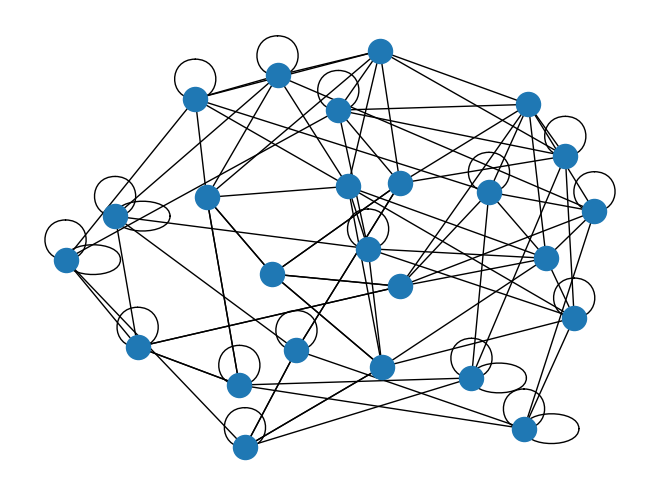

In [5]:
G_mgg = margulis_gabber_galil_graph(5)
nx.draw(G_mgg)

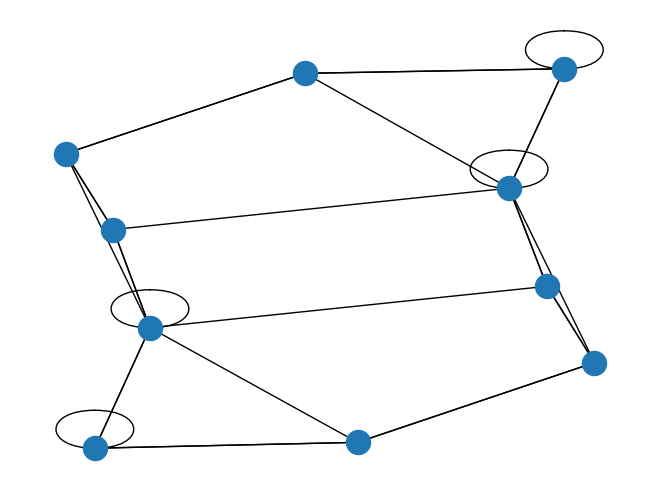

In [6]:
G_ccg5 = chordal_cycle_graph(10)
nx.draw(G_ccg5)

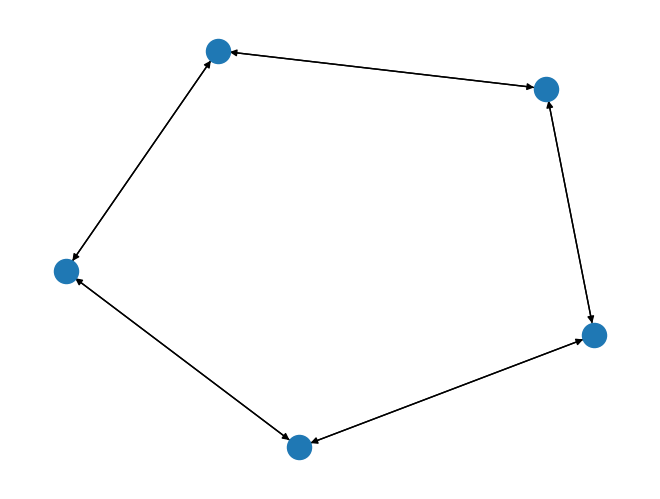

In [7]:
G_pg5 = paley_graph(5)
nx.draw(G_pg5)

In [8]:
nx.adjacency_matrix(G_pg5).todense()

array([[0, 1, 1, 0, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 0, 1],
       [0, 1, 0, 0, 1],
       [0, 0, 1, 1, 0]])

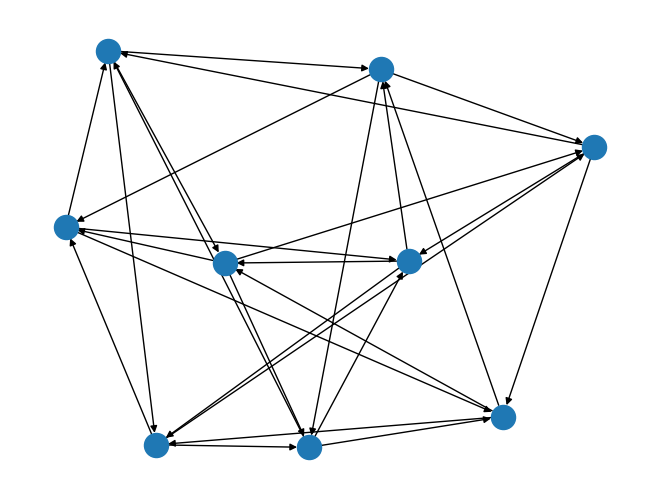

In [9]:
G_pg9 = paley_graph(9)
nx.draw(G_pg9)

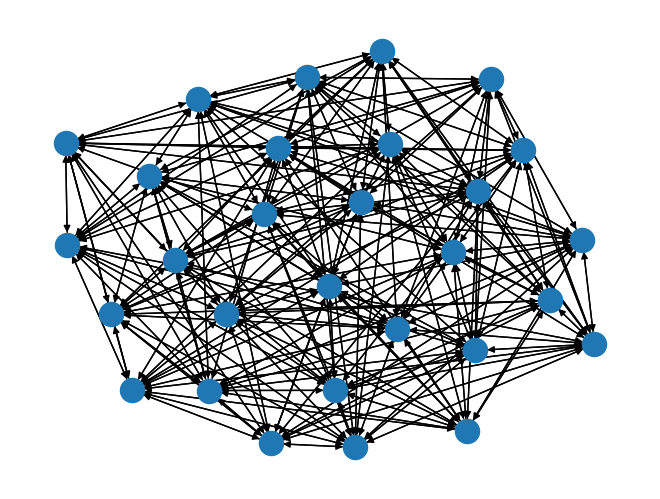

In [10]:
G_pg29 = paley_graph(29)
nx.draw(G_pg29)

In [11]:
for v in G_mgg.nodes(data=True):
    print(v)

((0, 0), {})
((1, 0), {})
((0, 1), {})
((2, 1), {})
((3, 1), {})
((0, 2), {})
((4, 2), {})
((0, 3), {})
((1, 3), {})
((2, 3), {})
((0, 4), {})
((3, 4), {})
((4, 4), {})
((2, 0), {})
((1, 2), {})
((1, 1), {})
((4, 1), {})
((1, 4), {})
((3, 3), {})
((3, 0), {})
((2, 4), {})
((2, 2), {})
((4, 3), {})
((4, 0), {})
((3, 2), {})


8


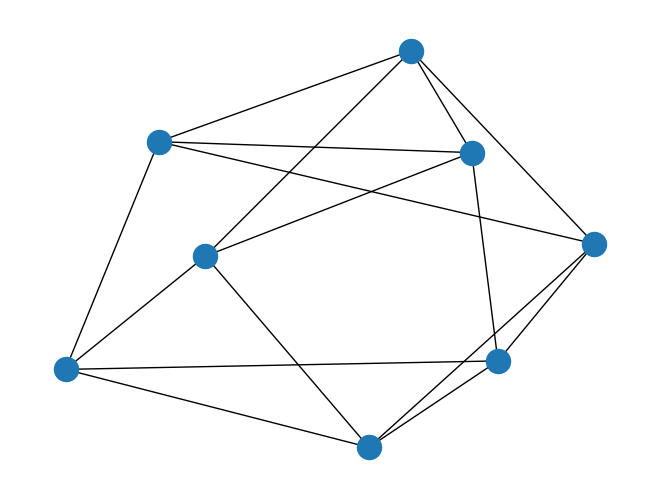

In [12]:
G_1 = nx.random_regular_graph(4, 8)
n = nx.number_of_nodes(G_1)
print(n)
nx.draw(G_1)

In [13]:
m = nx.number_of_edges(G_1); m

16

In [14]:
ls_cv = []
for i in range(2, n//2 + 1):
    for nodes in itertools.combinations(G_1, i):
        edge_set = set()
        for j in nodes:
            edges_j = set(map(lambda t: tuple(sorted(t)), G_1.edges(j)))
            edge_set.update(edges_j)
        num_dels = 0
        num_s = 0
        for e in edge_set:
            if e[0] in nodes and e[1] in nodes:
                num_s += 1
            else:
                num_dels += 1
        if num_s != 0: 
            ls_cv.append(num_dels/num_s)
        else:
            continue
print(min(ls_cv))


1.2
